In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('mall customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.rename(columns={'Annual Income (k$)':'income', 'Age':'age', 'Spending Score (1-100)':'score'}, inplace=True)

In [5]:
df.head()

,CustomerID,Gender,age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df = df.drop('CustomerID',axis=1)

In [7]:
df.head()

,Gender,age,income,score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [8]:
df.to_csv('new.csv')

In [9]:
df.describe() # descriptive statistics

,age,income,score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [10]:
df.age.std() #standard deviation

13.969007331558883

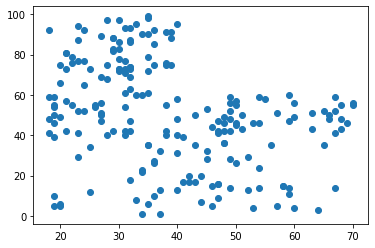

In [11]:
#viz
plt.scatter(df.age, df.score)

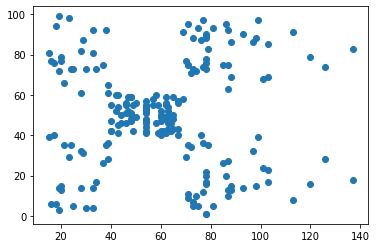

In [12]:
#viz
plt.scatter(df.income, df.score)

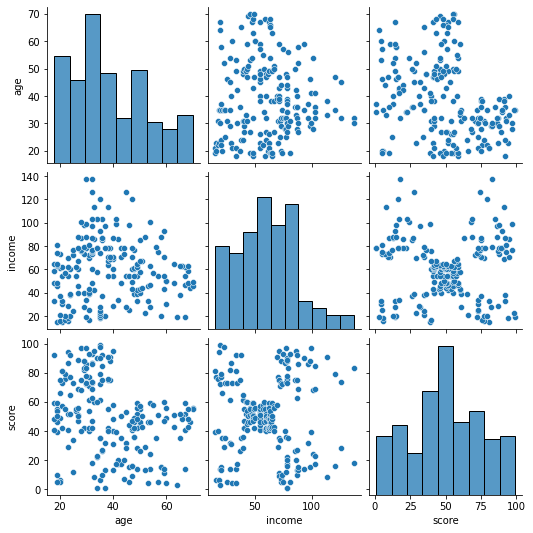

In [13]:
#pairplot
import seaborn as sns
sns.pairplot(df[['age', 'income', 'score']])

# KMeans Cluser

In [14]:
import sklearn.cluster as cluster

In [15]:
kmeans = cluster.KMeans() # default, n_clusters=8

In [16]:
predicted = kmeans.fit_predict(df[['income', 'score']])

In [17]:
predicted

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0, 4, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 1, 7, 1, 7, 1, 2, 1, 2, 1,
       7, 1, 2, 1, 2, 1, 2, 1, 2, 1, 7, 1, 2, 1, 7, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 7, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6,
       5, 6])

In [18]:
df['cluster_1'] = predicted

In [19]:
df.head()

,Gender,age,income,score,cluster_1
0,Male,19,15,39,3
1,Male,21,15,81,4
2,Female,20,16,6,3
3,Female,23,16,77,4
4,Female,31,17,40,3


In [20]:
df.tail()

,Gender,age,income,score,cluster_1
195,Female,35,120,79,6
196,Female,45,126,28,5
197,Male,32,126,74,6
198,Male,32,137,18,5
199,Male,30,137,83,6


In [21]:
center = kmeans.cluster_centers_

In [22]:
center

array([[ 47.72340426,  50.82978723],
       [ 78.55172414,  82.17241379],
       [ 80.18181818,  12.68181818],
       [ 25.14285714,  19.52380952],
       [ 25.0952381 ,  80.04761905],
       [109.7       ,  22.        ],
       [109.7       ,  82.        ],
       [ 64.45      ,  46.45      ]])

In [23]:
df0 = df[df.cluster_1 == 0]
df1 = df[df.cluster_1 == 1]
df2 = df[df.cluster_1 == 2]
df3 = df[df.cluster_1 == 3]
df4 = df[df.cluster_1 == 4]
df5 = df[df.cluster_1 == 5]
df6 = df[df.cluster_1 == 6]
df7 = df[df.cluster_1 == 7]

In [24]:
df0.shape

(47, 5)

In [25]:
df2.shape

(22, 5)

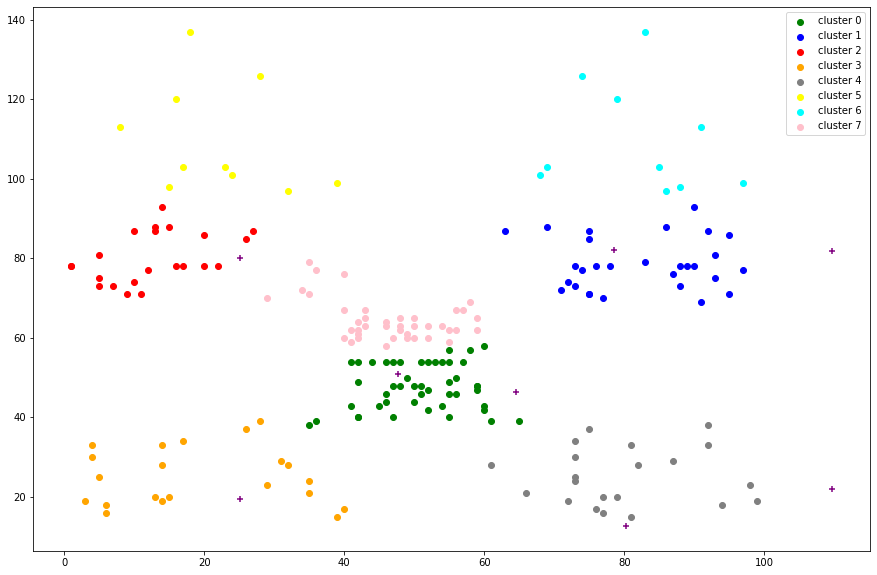

In [26]:
plt.figure(figsize=(15,10))
plt.scatter(df0['score'], df0['income'], color='green', label='cluster 0')
plt.scatter(df1['score'], df1['income'], color='blue', label='cluster 1')
plt.scatter(df2['score'], df2['income'], color='red', label='cluster 2')
plt.scatter(df3['score'], df3['income'], color='orange', label='cluster 3')
plt.scatter(df4['score'], df4['income'], color='gray', label='cluster 4')
plt.scatter(df5['score'], df5['income'], color='yellow', label='cluster 5')
plt.scatter(df6['score'], df6['income'], color='cyan', label='cluster 6')
plt.scatter(df7['score'], df7['income'], color='pink', label='cluster 7')

plt.scatter(center[:,0] , center[:,1], color='purple', marker='+')

plt.legend()

# Select Optimal Number of Cluster

In [27]:
wcss = [] 
clusters = range(1,15)
for k in clusters:
    km = cluster.KMeans(n_clusters=k)
    km.fit(df[['score','income']])
    wcss.append(km.inertia_)
    

In [28]:
wcss

[269981.28,
 181363.59595959593,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37233.81451071001,
 30273.394312070042,
 25030.38309852033,
 21818.11458845218,
 19646.482018947238,
 17518.643456567686,
 15830.061351769416,
 14573.469651444651,
 12867.662178262914]

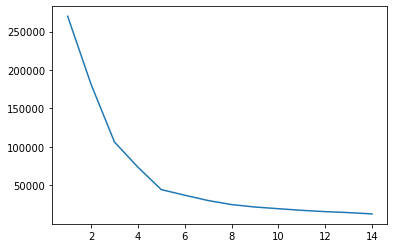

In [29]:
plt.plot(clusters,wcss)

In [30]:
#Knee
!pip install kneed

Defaulting to user installation because normal site-packages is not writeable


In [31]:
from kneed import KneeLocator
kn = KneeLocator(clusters, wcss, curve='convex', direction='decreasing')

In [32]:
kn.knee

5

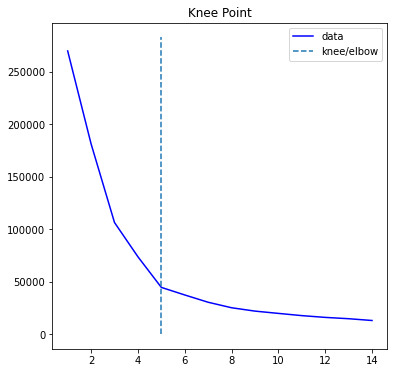

In [33]:
kn.plot_knee()

In [34]:
kmeans2 = cluster.KMeans(n_clusters=5) # default, n_clusters=5
predicted2 = kmeans2.fit_predict(df[['income', 'score']])

In [35]:
df['finalcluster'] = df['cluster_1'] 

In [36]:
df.drop(['finalcluster', 'cluster_1'], axis=1, inplace=True)

In [37]:
df['new_cluster'] = predicted2

In [38]:
df.head()

,Gender,age,income,score,new_cluster
0,Male,19,15,39,3
1,Male,21,15,81,0
2,Female,20,16,6,3
3,Female,23,16,77,0
4,Female,31,17,40,3


In [39]:
center2 = kmeans2.cluster_centers_
center2

array([[25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [55.2962963 , 49.51851852]])

In [40]:
df0 = df[df.new_cluster == 0]
df1 = df[df.new_cluster == 1]
df2 = df[df.new_cluster == 2]
df3 = df[df.new_cluster == 3]
df4 = df[df.new_cluster == 4]


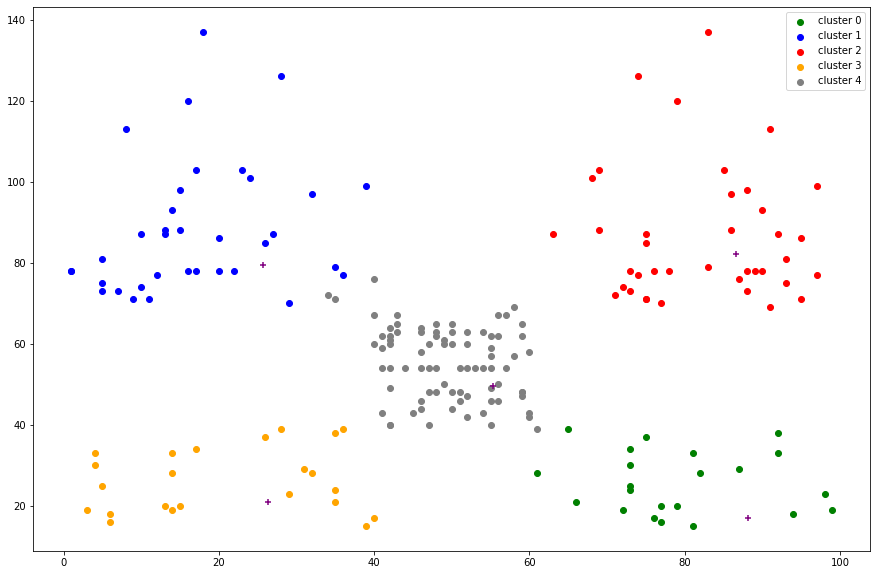

In [41]:
plt.figure(figsize=(15,10))
plt.scatter(df0['score'], df0['income'], color='green', label='cluster 0')
plt.scatter(df1['score'], df1['income'], color='blue', label='cluster 1')
plt.scatter(df2['score'], df2['income'], color='red', label='cluster 2')
plt.scatter(df3['score'], df3['income'], color='orange', label='cluster 3')
plt.scatter(df4['score'], df4['income'], color='gray', label='cluster 4')

plt.scatter(center2[:,0] , center2[:,1], color='purple', marker='+')

plt.legend()

In [42]:
kmeans2.predict([[15,40]])

array([3])